In [1]:
%pylab inline
import animatplot as amp

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
def G(tt):
    return E0*e**(-(tt-t0)**2/s**2)

$$\mu\frac{\partial H_y}{\partial t }=\frac{\partial E_z}{\partial x }$$

$$\epsilon\frac{\partial E_z}{\partial t }=\frac{\partial H_y}{\partial x }$$

In [4]:
imp0=377
t0=20
s=10
T=300
size=201
E0=10

In [5]:
epsR = zeros(size)
for i in range(len(epsR)):
    if abs(i-100) < 7*s:
        epsR[i] = 1
    else:
        epsR[i] = 5

In [6]:
Hy=zeros((T,size))
Ez=zeros((T,size))

for i in range(0,T):
    Hy[i,size-1]=Hy[i-1,size-2]
    for j in range(0,size-1):
        Hy[i,j]=Hy[i-1,j]+(Ez[i-1,j+1]-Ez[i-1,j])/imp0/epsR[j]   
    
    Ez[i,0]=Ez[i-1,1]
    for j in range(1,size):
        Ez[i,j]=Ez[i-1,j]+(Hy[i,j]-Hy[i,j-1])*imp0
    Ez[i,100]=G(i)

<IPython.core.display.Javascript object>


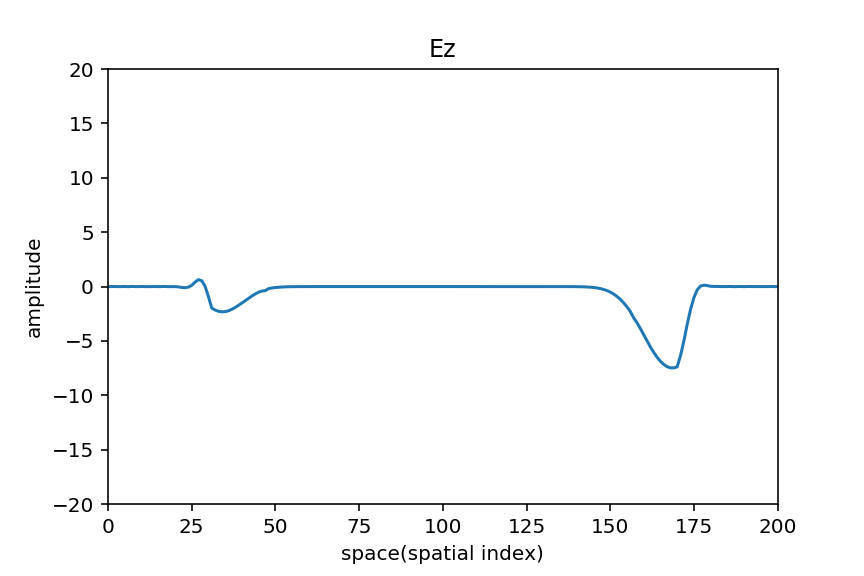

<IPython.core.display.Javascript object>


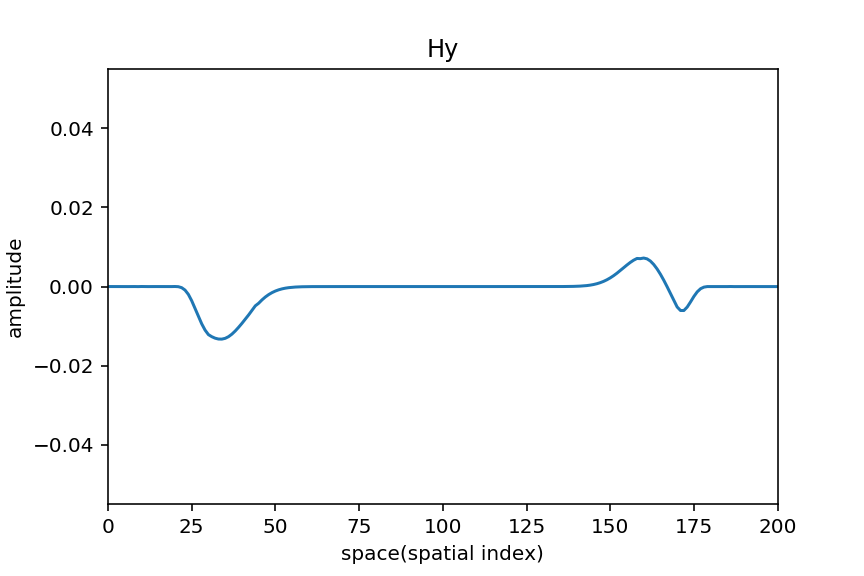

In [7]:
figure(1)
z = linspace(0,size-1,size)
t = linspace(0, T-1, T)
Z,TT  = meshgrid(z, t)
block = amp.blocks.Line(Z, Ez)
anim = amp.Animation([block])
xlim(0,200)
ylim(-20,20)
xlabel('space(spatial index)')
ylabel('amplitude')
title('Ez')
anim.save_gif('Ez') 

figure(2)
y = linspace(0,size-1,size)
t = linspace(0, T-1, T)
Y, TT = np.meshgrid(y, t)
block = amp.blocks.Line(Y, Hy)
anim = amp.Animation([block])
xlim(0,200)
xlabel('space(spatial index)')
ylabel('amplitude')
title('Hy')
anim.save_gif('Hy') 
show()
